In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [19]:
data_red = pd.read_csv('winequality-red.csv')
data_white = pd.read_csv('winequality-white.csv')

In [20]:
data_red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [21]:
data_red = data_red.set_axis(['old'],axis=1, inplace = False)
data_red.head()

,old
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [22]:
data_red = data_red['old'].str.split(';', expand=True)

In [23]:
cols = data_white.columns.values
col = np.array2string(data_white.columns.values).split(';')
s = []
for c in col:
    s.append(re.sub((r'\W+'), '',c))

In [24]:
data_red = data_red.set_axis(s,axis=1,inplace = False)

In [25]:
data_red.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [26]:
data_red[s] = data_red[s].astype(float) #covert string data to numerical data

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
# separate the data into training and response
X = data_red.drop('quality', axis=1)
y = data_red['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.25, random_state=50)


# rescaling using standardized scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validate = sc.fit_transform(X_validate)
X_test = sc.fit_transform(X_test)

#we lock away X_test, y_test for final model

In [29]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [30]:
# run linear regression model 
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_validate)
#reg.coef_

In [31]:
#create a dummy model to compare to
y_mean = np.array(y_validate)
y_mean.fill(np.mean(y_validate))
print(mean_squared_error(y_validate, y_mean))
np.mean(y_test)

0.5923437500000001


5.5125

0.34557551417770604


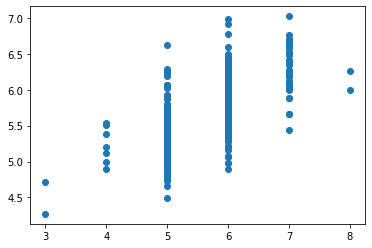

In [32]:
#from sklearn.metrics import mean_squared_error, r2_score
# mean square error 
print(mean_squared_error(y_validate, y_pred))
# y vs ypred
plt.scatter(y_validate, y_pred)
plt.show()

# so it's better than our dummy model

In [33]:
# using gradient descent
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(alpha=0.0001, penalty = 'elasticnet')
clf.fit(X_train, y_train)
y_pred_gd = clf.predict(X_validate)

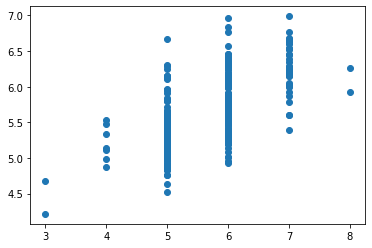

0.3501127419016446


In [34]:
plt.scatter(y_validate, y_pred_gd)
plt.show()

print(mean_squared_error(y_validate, y_pred_gd))

In [35]:
#We need to tune hyperparamters
#Are these good ranges for hyperparameters?
#Tune penalty and alpha, with alpha being 10^-1,-2,-3...
params = {'alpha': [0.1,0.001,0.0001,0.00001,0.000001], 'penalty':['l1','l2','elasticnet']}

In [36]:
from sklearn.model_selection import GridSearchCV
clf = SGDRegressor()
tuner = GridSearchCV(clf, params)
tuner.fit(X_train, y_train)
GridSearchCV(estimator=SGDRegressor(),
             param_grid=params)
sorted(tuner.cv_results_.keys())
tuner.cv_results_
                  

{'mean_fit_time': array([0.00237584, 0.00141664, 0.00171289, 0.00161748, 0.00132399,
        0.00152292, 0.00155711, 0.00132298, 0.00153689, 0.00157409,
        0.00128846, 0.00152435, 0.00161142, 0.00130472, 0.00157747]),
 'std_fit_time': array([6.27658091e-04, 6.91669351e-05, 1.27307091e-04, 1.00499175e-04,
        6.76101284e-05, 5.49620968e-05, 1.29074014e-04, 4.25340349e-05,
        9.83979097e-05, 1.34444015e-04, 3.38794059e-05, 5.77677147e-05,
        1.73877177e-04, 1.70535795e-05, 1.22718154e-04]),
 'mean_score_time': array([0.00044742, 0.00039949, 0.00037556, 0.00036178, 0.00037894,
        0.00036726, 0.00035114, 0.00036201, 0.00037265, 0.00034976,
        0.00036707, 0.00036998, 0.00034719, 0.00037899, 0.00036893]),
 'std_score_time': array([1.07202135e-04, 5.88966280e-06, 1.65870806e-05, 1.35060285e-05,
        8.62877649e-06, 5.89930630e-06, 6.24347202e-06, 4.75547955e-06,
        1.30717756e-05, 4.37288533e-06, 6.72424933e-06, 4.26069410e-06,
        8.44876865e-06, 8.35

In [37]:
tuner.cv_results_['params'][5]

{'alpha': 0.001, 'penalty': 'elasticnet'}

In [38]:
new_cols = ['f1^2','f2^2','f3^2','f4^2','f5^2','f6^2','f7^2','f8^2','f9^2','f10^2','f11^2']

In [39]:
data_square = data_red
data_square[new_cols] = data_red[s[:11]] ** 2
data_square.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,...,f2^2,f3^2,f4^2,f5^2,f6^2,f7^2,f8^2,f9^2,f10^2,f11^2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.4900,0.0000,3.61,0.005776,121.0,1156.0,0.995605,12.3201,0.3136,88.36
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.7744,0.0000,6.76,0.009604,625.0,4489.0,0.993610,10.2400,0.4624,96.04
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.5776,0.0016,5.29,0.008464,225.0,2916.0,0.994009,10.6276,0.4225,96.04
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.0784,0.3136,3.61,0.005625,289.0,3600.0,0.996004,9.9856,0.3364,96.04
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.4900,0.0000,3.61,0.005776,121.0,1156.0,0.995605,12.3201,0.3136,88.36


In [117]:
new_cols_3 = ['f1^3','f2^3','f3^3','f4^3','f5^3','f6^3','f7^3','f8^3','f9^3','f10^3','f11^3']
data_3 = data_red
data_3[new_cols_3] = data_red[s[:11]] ** 3
data_3.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,...,f2^3,f3^3,f4^3,f5^3,f6^3,f7^3,f8^3,f9^3,f10^3,f11^3
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.343000,0.000000,6.859,0.000439,1331.0,39304.0,0.993415,43.243551,0.175616,830.584
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.681472,0.000000,17.576,0.000941,15625.0,300763.0,0.990431,32.768000,0.314432,941.192
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.438976,0.000064,12.167,0.000779,3375.0,157464.0,0.991027,34.645976,0.274625,941.192
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.021952,0.175616,6.859,0.000422,4913.0,216000.0,0.994012,31.554496,0.195112,941.192
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.343000,0.000000,6.859,0.000439,1331.0,39304.0,0.993415,43.243551,0.175616,830.584


In [118]:
# separate the data into training and response
X_s = data_3.drop('quality', axis=1)
y_s = data_3['quality']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=50)
X_train_s, X_validate_s, y_train_s, y_validate_s = train_test_split(X_train_s, y_train_s, test_size=0.25, random_state=50)


# rescaling using standardized scaling
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train_s)
X_validate_s = sc.fit_transform(X_validate_s)
X_test_s = sc.fit_transform(X_test_s)

In [119]:
reg = linear_model.LinearRegression()
reg.fit(X_train_s, y_train_s)
y_pred_s = reg.predict(X_validate_s)
y_mean_s = np.array(y_validate_s)
y_mean_s.fill(np.mean(y_validate_s))
print(mean_squared_error(y_validate_s, y_mean_s))
np.mean(y_test_s)

0.5923437500000001


5.5125

0.33925631158979497


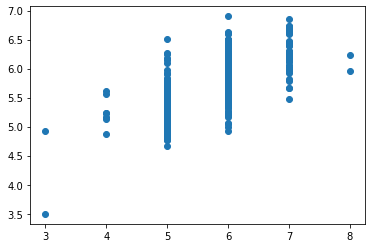

In [120]:
# 3-degree
print(mean_squared_error(y_validate_s, y_pred_s))
# y vs ypred
plt.scatter(y_validate_s, y_pred_s)
plt.show()

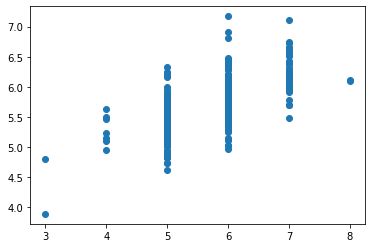

0.33865073722631245


In [131]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(alpha=0.00001, penalty = 'l2')
clf.fit(X_train_s, y_train_s)
y_pred_gd = clf.predict(X_validate_s)
plt.scatter(y_validate_s, y_pred_gd)
plt.show()

print(mean_squared_error(y_validate, y_pred_gd))

In [124]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X_train_3 = poly.fit_transform(X_train)
X_validate_3 = poly.fit_transform(X_validate)

# rescaling using standardized scaling
sc = StandardScaler()
X_train_3 = sc.fit_transform(X_train_3)
X_validate_3 = sc.fit_transform(X_validate_3)

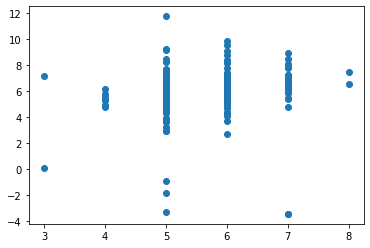

0.34198805689483736


In [127]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
clf = SGDRegressor(alpha=0.000001, penalty = 'l2')
clf.fit(X_train_3, y_train)
y_pred_gd_3 = model.predict(X_validate_3)
plt.scatter(y_validate, y_pred_gd_3)
plt.show()

print(mean_squared_error(y_validate, y_pred_gd))

In [128]:
# param_grid = {'poly_degree': [8,7,6,5,4,3,2,1],
#              'sgd_penalty': ['l1','l2'],
#              'sgd_alpha': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1],
#               'sgd_eta0':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
#              }

In [111]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler
# sgd_pipeline = Pipeline([
#     ('poly', PolynomialFeatures(include_bias=False)),
#     ('scaler', MinMaxScaler()),
#     ('sgd',SGDRegressor(learning_rate = 'constant')),
# ])
# param_grid = {'poly_degree': [8,7,6,5,4,3,2,1],
#              'sgd_penalty': ['l1','l2'],
#              'sgd_alpha': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1],
#               'sgd_eta0':[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
#              }
# sgd = GridSearchCV(sgd_pipeline,param_grid,cv=5,n_jobs=-1)
# sgd.fit(X_train, y_train)


ValueError: Invalid parameter 'poly_degree' for estimator Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', MinMaxScaler()),
                ('sgd', SGDRegressor(learning_rate='constant'))]). Valid parameters are: ['memory', 'steps', 'verbose'].